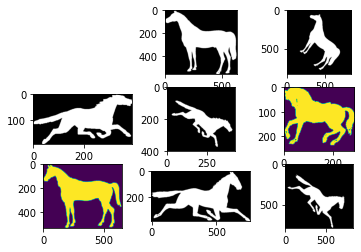

In [1]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'training/'
# plot first few images
for i in range(1,9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'horse-' + str(i) + '.gif'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

## Pre processing photo sizes


In [2]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir, makedirs
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array



In [3]:
# define location of dataset
folder = 'training/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('camel'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('cbir_photos.npy', photos)
save('cbir_labels.npy', labels)

(400, 200, 200, 3) (400,)


In [4]:

# load and confirm the shape
from numpy import load
photos = load('cbir_photos.npy')
labels = load('cbir_labels.npy')
print(photos.shape, labels.shape)

(400, 200, 200, 3) (400,)


### Creating directories for ImageDataGenerator

In [5]:

# create directories
dataset_home = 'CBIR Dataset/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['camel/', 'classic/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)


In [6]:

# seed random number generator
#seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('camel'):
		dst = dataset_home + dst_dir + 'camel/'  + file
		copyfile(src, dst)
	elif file.startswith('classic'):
		dst = dataset_home + dst_dir + 'classic/'  + file
		copyfile(src, dst)

NameError: name 'random' is not defined

### Defining CNN Model

In [7]:
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from keras.models import Sequential



# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [8]:

# define model
model = define_model()

### Creating Image Data Generator to flow in data

In [13]:

# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [19]:

# prepare iterators
train_it = datagen.flow_from_directory('./datasetall/train/',
	class_mode='binary', batch_size=16, target_size=(200, 200))
test_it = datagen.flow_from_directory('./datasetall/validation/',
	class_mode='binary', batch_size=16, target_size=(200, 200))

Found 1 images belonging to 20 classes.
Found 0 images belonging to 20 classes.


In [18]:
tset = datagen.flow_from_directory('Database 4/')

Found 0 images belonging to 0 classes.
